In [2]:
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt
import pandas as pd
import os

TIC 77842052


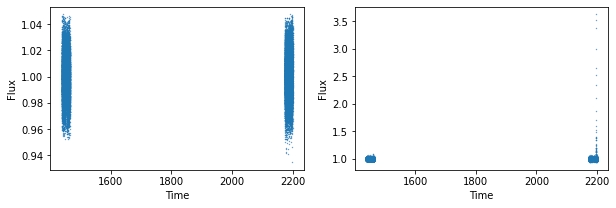

In [95]:
data_path = r'C:\Users\Research\Documents\GitHub\sunnyhills\data\current\processed\two_min_lightcurves'
ids = [i.replace('.csv', '') for i in os.listdir(data_path) if i!='.gitkeep']
np.random.shuffle(ids)
id = ids[0].replace('_', ' ')
print(id)

df = pd.read_csv(data_path+'\\'+id.replace(' ', '_')+'.csv')

fig, axs = plt.subplots(1,2, figsize=(10,3))
ax = axs[0]
ax.scatter(df['cleaned_time'], df['detrended_flux'], s=0.1)
ax = axs[1]
ax.scatter(df['raw_time'], df['raw_flux'], s=0.1)

for i in range(2): 
    axs[i].set(xlabel='Time', ylabel='Flux')

In [90]:
from astropy.timeseries import BoxLeastSquares

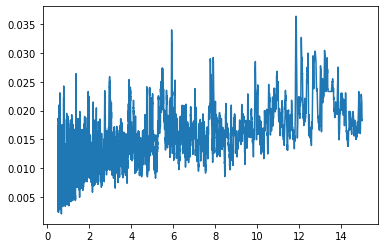

In [94]:
time, flux = (df['cleaned_time'], df['detrended_flux'])

mask = np.isfinite(flux)

time = time[mask]
flux = flux[mask]

model = BoxLeastSquares(time, flux)
periodogram = model.autopower(0.2, objective="snr", minimum_period=0.5, maximum_period=15)

plt.plot(periodogram.period, periodogram.power)  


In [ ]:
lc = lk.search_lightcurve(id).download_all().stitch().flatten(window_length=901).remove_outliers()